![VC Logo](http://logonews.fr/wp-content/uploads/2018/10/Capture-d%E2%80%99%C3%A9cran-2018-10-22-%C3%A0-10.11.53.png)

In [4]:
pip install xgboost
pip install -U imbalanced-learn
pip install catboost

  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
print("Importing modules...")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
import time

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

print("...Done !")

Importing modules...
...Done !


# 1 - Import the train and test datasets

In [52]:
print("Importing the datasets...")
train = pd.read_csv('src/train.csv', index_col=0)
test = pd.read_csv('src/test.csv', index_col=0)
print("...Done !")

Importing the datasets...
...Done !


In [7]:
train.head()

,ID_PRODUCT,ID_SELLER,ID_SELLER_COUNTRY,SELLER_GEO_1,SELLER_GEO_2,SELLER_GEO_3,DEPOSIT_PRICE,INSERTION_PRICE,PRICE,RECO_PRICE,...,TOTAL_TRK_1D,TOTAL_TRK_7D,TOTAL_TRK_30D,NB_DROP_SELLER_1D,NB_DROP_SELLER_7D,NB_DROP_SELLER_30D,NB_WIDTHDRAW_SELLER_1D,NB_WIDTHDRAW_SELLER_7D,NB_WIDTHDRAW_SELLER_30D,LABEL
0,f398701175db97ad9f9ae4f061a8c7d7ef4da505708f0b...,904fc91a25b0630028eaaf0941b228a62f9341eadde903...,1253e9373e781b7500266caa55150e08e210bc8cd8cc70...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,cf62a64b8a54fd96e70623b69429a70e1ba0e0ef9b502c...,5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed0...,78.000000,78.000000,67.000000,52.0,...,0,8,26,0,0,0,0,0,0,0
1,7e0544c102ef705f3939dacb080bb23686355879c3ac77...,216fce1cec515e792bd2d5aa5c68ac84d8118ad11823fb...,eb624dbe56eb6620ae62080c10a273cab73ae8eca98ab1...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,09fbaf8891f39040036484a565bfc3f832713ce3f2d22b...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,258.000000,262.000000,118.000000,94.0,...,39,154,612,2,25,123,0,5,5,0
2,fe9ca89ffb93396c469674056158d6ddfe10e94efb3807...,562a34b067f011d9736069d692be44aeb624a7d8b6eba6...,eb624dbe56eb6620ae62080c10a273cab73ae8eca98ab1...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,09fbaf8891f39040036484a565bfc3f832713ce3f2d22b...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,478.000000,478.000000,232.000000,2.0,...,12,75,113,1,11,16,0,2,2,0
3,66832d4bbd55c568753a6ec237f8aa213c0cf55929a544...,90c4e50ebbc3dd146dc2852b2b8d428c23fb4eebfee02e...,56f4da26ed956730309fa1488611ee0f13b0ac95ebb1bc...,2099c82f0bcc1c13c9ecc9dd8848c23916cf0eea8f7eef...,9b202ecbc6d45c6d8901d989a918878397a3eb9d00e8f4...,49dca65f362fee401292ed7ada96f96295eab1e589c52e...,350.473498,354.473498,287.256198,0.0,...,4,6,8,0,0,4,0,0,1,0
4,72a3d1f2ed0a526408159da9bb5bb584790eed9ff6d074...,adb633b0e58e3969d4dc099e4b8beb734282f3bcbbd77d...,eb624dbe56eb6620ae62080c10a273cab73ae8eca98ab1...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,09fbaf8891f39040036484a565bfc3f832713ce3f2d22b...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,91.000000,91.000000,72.000000,86.0,...,18,91,373,2,8,33,0,0,4,0


# 2 - EDA & Preprocessing

In [58]:
train[num_var]

,DEPOSIT_PRICE,INSERTION_PRICE,PRICE,RECO_PRICE,TIME_ONLINE,SELLER_FROM_FIRST_SELL_TO_INVOICE,NB_DAYS_SINCE_LAST_LIKES,NB_DAYS_SINCE_LAST_WISHLISTS,NB_DAYS_SINCE_SELLER_REPLY_TO_MMAO,NB_DAYS_SINCE_LAST_ORDER,NB_DAYS_SINCE_LAST_DEPOSITED,NB_DAYS_SINCE_LAST_PUBLISHED,NB_DAYS_SINCE_LAST_SOLD,NB_DAYS_SINCE_LAST_REPAY,NON_RECEIVED_PCT,NB_DAYS_SINCE_LAST_BS_CHAT,NB_DAYS_SINCE_LAST_SESSION
0,78.000000,78.000000,67.000000,52.0,108.916667,107.0,60.000000,60.0,4.958333,107.000000,106.875000,107.208333,107.000000,107.791667,0.999900,6.875000,2.791667
1,258.000000,262.000000,118.000000,94.0,142.083333,3676.0,2.250000,60.0,0.166667,9.333333,1.291667,1.250000,9.333333,13.791667,0.999900,0.916667,0.791667
2,478.000000,478.000000,232.000000,2.0,11.083333,393.0,10.750000,60.0,0.000000,11.708333,2.000000,1.125000,11.708333,237.625000,0.499975,1.291667,0.625000
3,350.473498,354.473498,287.256198,0.0,121.166667,126.0,60.000000,60.0,11.750000,36.583333,78.916667,78.750000,36.583333,365.000000,0.000000,3.291667,0.166667
4,91.000000,91.000000,72.000000,86.0,11.875000,1694.0,60.000000,60.0,0.166667,12.083333,10.875000,10.875000,12.083333,150.500000,0.000000,30.000000,0.541667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,136.793597,136.793597,139.652614,156.0,20.583333,192.0,60.000000,60.0,6.666667,132.583333,19.666667,19.583333,132.583333,365.000000,0.000000,30.000000,7.166667
399996,248.000000,252.000000,192.000000,NaN,12.166667,241.0,15.791667,60.0,1.083333,8.041667,1.416667,1.291667,8.041667,19.916667,0.666656,0.666667,0.916667
399997,288.000000,292.000000,208.000000,140.0,2.000000,2978.0,52.416667,60.0,3.833333,19.375000,1.041667,1.000000,19.375000,37.833333,0.999900,8.458333,0.833333
399998,72.000000,72.000000,63.000000,43.0,22.125000,533.0,60.000000,60.0,1.625000,3.458333,0.458333,0.416667,3.458333,93.000000,0.999950,6.750000,0.000000


<AxesSubplot:>

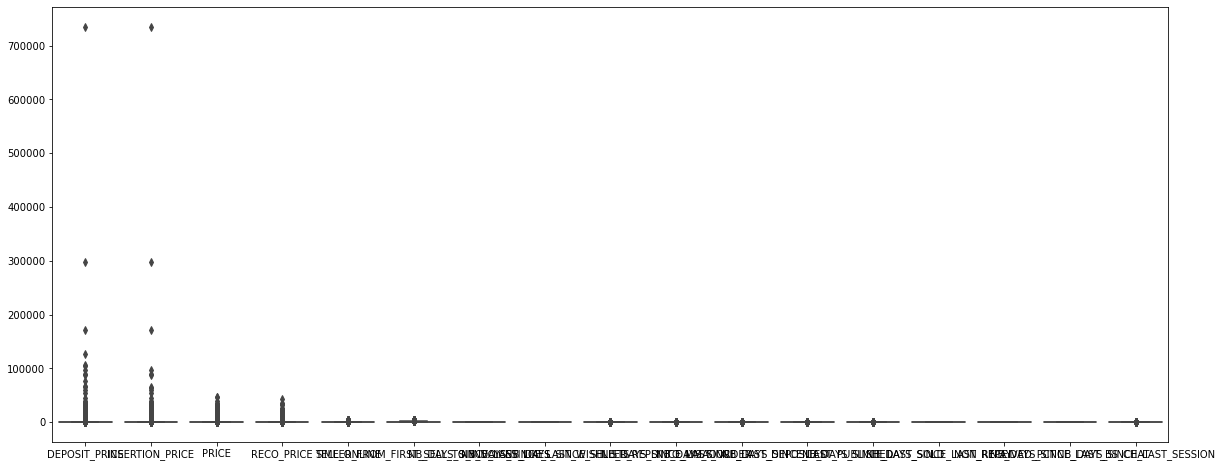

In [59]:
plt.figure(figsize=(20,8))
sns.boxplot(data=train[num_var])

<AxesSubplot:>

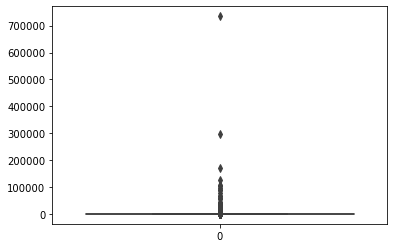

In [61]:
sns.boxplot(data=train["DEPOSIT_PRICE"])

In [5]:
train.columns

Index(['ID_PRODUCT', 'ID_SELLER', 'ID_SELLER_COUNTRY', 'SELLER_GEO_1',
       'SELLER_GEO_2', 'SELLER_GEO_3', 'DEPOSIT_PRICE', 'INSERTION_PRICE',
       'PRICE', 'RECO_PRICE', 'TIME_ONLINE', 'SEGMENT', 'MMAO_NB',
       'BRAND_GROUP', 'ID_BRAND', 'ID_PAGE', 'ID_SITE', 'LANGUAGE',
       'ID_UNIVERSE', 'ID_CATEGORY', 'ID_SUB_SUBCATEGORY', 'ID_MODEL',
       'ID_MATERIAL', 'ID_COLOUR', 'ID_PATTERN', 'CURRENCY', 'ID_CONDITION',
       'FLAG1', 'DEPOSIT_DEVICE', 'SELLER_AGE',
       'SELLER_FROM_FIRST_SELL_TO_INVOICE', 'FLAG2', 'NB_DROP_PRODUCT_1D',
       'NB_DROP_PRODUCT_7D', 'NB_DROP_PRODUCT_30D', 'NB_BS_CHAT_PRODUCT_1D',
       'NB_BS_CHAT_PRODUCT_7D', 'NB_BS_CHAT_PRODUCT_30D',
       'NB_DAYS_SINCE_LAST_LIKES', 'NB_LIKES_1D', 'NB_LIKES_7D',
       'NB_LIKES_30D', 'NB_DAYS_SINCE_LAST_WISHLISTS', 'NB_WISHLISTS_1D',
       'NB_WISHLISTS_7D', 'NB_WISHLISTS_30D',
       'NB_DAYS_SINCE_SELLER_REPLY_TO_MMAO', 'TOTAL_MMAO_REPLIED_1D',
       'TOTAL_MMAO_TIMEOUT_1D', 'TOTAL_MMAO_REPLIED_7D',
 

In [6]:
print("Forme du train :",train.shape)
print("Forme du test :",test.shape)

Forme du train : (400000, 86)
Forme du test : (100000, 85)


In [7]:
train.head()

,ID_PRODUCT,ID_SELLER,ID_SELLER_COUNTRY,SELLER_GEO_1,SELLER_GEO_2,SELLER_GEO_3,DEPOSIT_PRICE,INSERTION_PRICE,PRICE,RECO_PRICE,...,TOTAL_TRK_1D,TOTAL_TRK_7D,TOTAL_TRK_30D,NB_DROP_SELLER_1D,NB_DROP_SELLER_7D,NB_DROP_SELLER_30D,NB_WIDTHDRAW_SELLER_1D,NB_WIDTHDRAW_SELLER_7D,NB_WIDTHDRAW_SELLER_30D,LABEL
0,f398701175db97ad9f9ae4f061a8c7d7ef4da505708f0b...,904fc91a25b0630028eaaf0941b228a62f9341eadde903...,1253e9373e781b7500266caa55150e08e210bc8cd8cc70...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,cf62a64b8a54fd96e70623b69429a70e1ba0e0ef9b502c...,5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed0...,78.000000,78.000000,67.000000,52.0,...,0,8,26,0,0,0,0,0,0,0
1,7e0544c102ef705f3939dacb080bb23686355879c3ac77...,216fce1cec515e792bd2d5aa5c68ac84d8118ad11823fb...,eb624dbe56eb6620ae62080c10a273cab73ae8eca98ab1...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,09fbaf8891f39040036484a565bfc3f832713ce3f2d22b...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,258.000000,262.000000,118.000000,94.0,...,39,154,612,2,25,123,0,5,5,0
2,fe9ca89ffb93396c469674056158d6ddfe10e94efb3807...,562a34b067f011d9736069d692be44aeb624a7d8b6eba6...,eb624dbe56eb6620ae62080c10a273cab73ae8eca98ab1...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,09fbaf8891f39040036484a565bfc3f832713ce3f2d22b...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,478.000000,478.000000,232.000000,2.0,...,12,75,113,1,11,16,0,2,2,0
3,66832d4bbd55c568753a6ec237f8aa213c0cf55929a544...,90c4e50ebbc3dd146dc2852b2b8d428c23fb4eebfee02e...,56f4da26ed956730309fa1488611ee0f13b0ac95ebb1bc...,2099c82f0bcc1c13c9ecc9dd8848c23916cf0eea8f7eef...,9b202ecbc6d45c6d8901d989a918878397a3eb9d00e8f4...,49dca65f362fee401292ed7ada96f96295eab1e589c52e...,350.473498,354.473498,287.256198,0.0,...,4,6,8,0,0,4,0,0,1,0
4,72a3d1f2ed0a526408159da9bb5bb584790eed9ff6d074...,adb633b0e58e3969d4dc099e4b8beb734282f3bcbbd77d...,eb624dbe56eb6620ae62080c10a273cab73ae8eca98ab1...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,09fbaf8891f39040036484a565bfc3f832713ce3f2d22b...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,91.000000,91.000000,72.000000,86.0,...,18,91,373,2,8,33,0,0,4,0


In [8]:
test.head()

,ID_PRODUCT,ID_SELLER,ID_SELLER_COUNTRY,SELLER_GEO_1,SELLER_GEO_2,SELLER_GEO_3,DEPOSIT_PRICE,INSERTION_PRICE,PRICE,RECO_PRICE,...,NB_DAYS_SINCE_LAST_SESSION,TOTAL_TRK_1D,TOTAL_TRK_7D,TOTAL_TRK_30D,NB_DROP_SELLER_1D,NB_DROP_SELLER_7D,NB_DROP_SELLER_30D,NB_WIDTHDRAW_SELLER_1D,NB_WIDTHDRAW_SELLER_7D,NB_WIDTHDRAW_SELLER_30D
0,d498549fd42b3fa9d7cccade9e776f9900c21fb2ff9e9b...,760986b19f7989b9065b729b9dc00d594065bd6123ffdc...,1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,cf62a64b8a54fd96e70623b69429a70e1ba0e0ef9b502c...,8ef41e6f4b07432a0cb4eb7a8774e7a3878fd3e385f49a...,273.0,277.0,113.00,86.0,...,0.541667,112,259,394,4,18,25,0,1,1
1,fef853b211565802a20f84076de7b5153a75c469778263...,ac04b64078fa078651c5fe2d75e98e1164872f26e5b016...,1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,cf62a64b8a54fd96e70623b69429a70e1ba0e0ef9b502c...,8ef41e6f4b07432a0cb4eb7a8774e7a3878fd3e385f49a...,78.0,78.0,49.00,72.0,...,0.458333,13,13,17,0,0,0,0,0,0
2,940f0cc35f814ff16990d70ffcf121920d1dd9265291ab...,047aee45253657289c7cfda4bf4be4f67df728087abe3e...,1253e9373e781b7500266caa55150e08e210bc8cd8cc70...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,cf62a64b8a54fd96e70623b69429a70e1ba0e0ef9b502c...,5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed0...,602.0,598.0,418.00,239.0,...,0.583333,5,12,53,0,0,0,0,0,0
3,1ad22f9da11ec0488e4b97a542b271062756e72e51d0ab...,735d1ba02ed55a9b4fae3453d69ecd3484cafce7b10d6e...,9b871512327c09ce91dd649b3f96a63b7408ef267c8cc5...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,e7d529decf2effa45e405e83edd0d9b4b82f6ad2a1b95d...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,47.0,43.0,28.75,2.0,...,0.958333,25,98,347,0,44,71,0,2,3
4,86fc29ecb1bde29cf1881baf4298d6c16df5e7b0408658...,616e7add0c28d00052df297a9e07fb761f637c453fdfbc...,1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...,7e3a78f9aa16d14453f363271db2973b903b3949684f0f...,cf62a64b8a54fd96e70623b69429a70e1ba0e0ef9b502c...,8ef41e6f4b07432a0cb4eb7a8774e7a3878fd3e385f49a...,512.0,512.0,398.00,227.0,...,0.916667,40,179,812,31,63,256,0,0,1


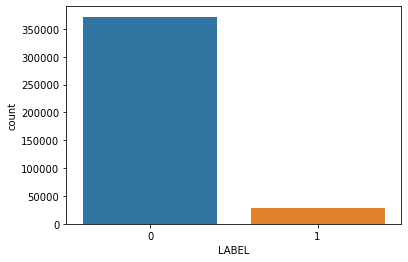

In [9]:
sns.countplot(x=train['LABEL']);

In [53]:
# Create X_test, y_test
X_train = train.copy()
y_train = X_train.pop('LABEL')
X_test = test.copy()

In [54]:
# Delete un-neccesary cols
col_to_drop = [c for c in X_train.columns if c.startswith('ID_') == True]
col_to_drop2 = ['SELLER_GEO_1', 'SELLER_GEO_2', 'SELLER_GEO_3','LANGUAGE', 'CURRENCY','SEGMENT']

X_train.drop(columns=col_to_drop,inplace=True)
X_train.drop(columns=col_to_drop2,inplace=True)

X_test.drop(columns=col_to_drop,inplace=True)
X_test.drop(columns=col_to_drop2,inplace=True)

In [12]:
X_train.columns

Index(['DEPOSIT_PRICE', 'INSERTION_PRICE', 'PRICE', 'RECO_PRICE',
       'TIME_ONLINE', 'MMAO_NB', 'BRAND_GROUP', 'FLAG1', 'DEPOSIT_DEVICE',
       'SELLER_AGE', 'SELLER_FROM_FIRST_SELL_TO_INVOICE', 'FLAG2',
       'NB_DROP_PRODUCT_1D', 'NB_DROP_PRODUCT_7D', 'NB_DROP_PRODUCT_30D',
       'NB_BS_CHAT_PRODUCT_1D', 'NB_BS_CHAT_PRODUCT_7D',
       'NB_BS_CHAT_PRODUCT_30D', 'NB_DAYS_SINCE_LAST_LIKES', 'NB_LIKES_1D',
       'NB_LIKES_7D', 'NB_LIKES_30D', 'NB_DAYS_SINCE_LAST_WISHLISTS',
       'NB_WISHLISTS_1D', 'NB_WISHLISTS_7D', 'NB_WISHLISTS_30D',
       'NB_DAYS_SINCE_SELLER_REPLY_TO_MMAO', 'TOTAL_MMAO_REPLIED_1D',
       'TOTAL_MMAO_TIMEOUT_1D', 'TOTAL_MMAO_REPLIED_7D',
       'TOTAL_MMAO_TIMEOUT_7D', 'TOTAL_MMAO_REPLIED_30D',
       'TOTAL_MMAO_TIMEOUT_30D', 'NB_DAYS_SINCE_LAST_ORDER',
       'TOTAL_ORDER_SOLD', 'RANK_SOLD', 'TOTAL_SOLD_30D', 'TOTAL_SOLD_90D',
       'TOTAL_SOLD_180D', 'NB_DAYS_SINCE_LAST_DEPOSITED',
       'NB_DAYS_SINCE_LAST_PUBLISHED', 'NB_DAYS_SINCE_LAST_SOLD',
    

In [55]:
num_var = [c for c in X_train.columns if X_train[c].dtypes == np.number]
cat_var = [c for c in X_train.columns if X_train[c].dtypes == 'object']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_var),
        ('cat', cat_transformer, cat_var)
    
])

/tmp/ipykernel_124/608482614.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  num_var = [c for c in X_train.columns if X_train[c].dtypes == np.number]


In [14]:
X_test.head()

,DEPOSIT_PRICE,INSERTION_PRICE,PRICE,RECO_PRICE,TIME_ONLINE,MMAO_NB,BRAND_GROUP,FLAG1,DEPOSIT_DEVICE,SELLER_AGE,...,NB_DAYS_SINCE_LAST_SESSION,TOTAL_TRK_1D,TOTAL_TRK_7D,TOTAL_TRK_30D,NB_DROP_SELLER_1D,NB_DROP_SELLER_7D,NB_DROP_SELLER_30D,NB_WIDTHDRAW_SELLER_1D,NB_WIDTHDRAW_SELLER_7D,NB_WIDTHDRAW_SELLER_30D
0,273.0,277.0,113.00,86.0,69.000000,7,84dbb38ca540e0bdede5d0c5081c5f4441373a3013cbdf...,0,358aea9928a74643fe553a5981f1f15a4f243e8668fefb...,1371,...,0.541667,112,259,394,4,18,25,0,1,1
1,78.0,78.0,49.00,72.0,2105.541667,6,e1b02f6c83178c5762e4dd0ef99b570f0d4725436b53bf...,0,68693d02ab4fbb2331b8cc39915322e48e61f06d4d1b31...,2254,...,0.458333,13,13,17,0,0,0,0,0,0
2,602.0,598.0,418.00,239.0,56.250000,20,4e2fa2bdaf89b268f619a77765fb963f83c988478d034c...,0,358aea9928a74643fe553a5981f1f15a4f243e8668fefb...,758,...,0.583333,5,12,53,0,0,0,0,0,0
3,47.0,43.0,28.75,2.0,334.166667,1,3296e6ce7d191ac467f35a1c89b7eb8b075de29143228a...,0,358aea9928a74643fe553a5981f1f15a4f243e8668fefb...,2159,...,0.958333,25,98,347,0,44,71,0,2,3
4,512.0,512.0,398.00,227.0,3.375000,6,e1b02f6c83178c5762e4dd0ef99b570f0d4725436b53bf...,0,358aea9928a74643fe553a5981f1f15a4f243e8668fefb...,1659,...,0.916667,40,179,812,31,63,256,0,0,1


In [15]:
X_train.head()

,DEPOSIT_PRICE,INSERTION_PRICE,PRICE,RECO_PRICE,TIME_ONLINE,MMAO_NB,BRAND_GROUP,FLAG1,DEPOSIT_DEVICE,SELLER_AGE,...,NB_DAYS_SINCE_LAST_SESSION,TOTAL_TRK_1D,TOTAL_TRK_7D,TOTAL_TRK_30D,NB_DROP_SELLER_1D,NB_DROP_SELLER_7D,NB_DROP_SELLER_30D,NB_WIDTHDRAW_SELLER_1D,NB_WIDTHDRAW_SELLER_7D,NB_WIDTHDRAW_SELLER_30D
0,78.000000,78.000000,67.000000,52.0,108.916667,5,e1b02f6c83178c5762e4dd0ef99b570f0d4725436b53bf...,0,358aea9928a74643fe553a5981f1f15a4f243e8668fefb...,108,...,2.791667,0,8,26,0,0,0,0,0,0
1,258.000000,262.000000,118.000000,94.0,142.083333,1,4e2fa2bdaf89b268f619a77765fb963f83c988478d034c...,0,358aea9928a74643fe553a5981f1f15a4f243e8668fefb...,3705,...,0.791667,39,154,612,2,25,123,0,5,5
2,478.000000,478.000000,232.000000,2.0,11.083333,4,4e2fa2bdaf89b268f619a77765fb963f83c988478d034c...,1,358aea9928a74643fe553a5981f1f15a4f243e8668fefb...,399,...,0.625000,12,75,113,1,11,16,0,2,2
3,350.473498,354.473498,287.256198,0.0,121.166667,0,84dbb38ca540e0bdede5d0c5081c5f4441373a3013cbdf...,1,68693d02ab4fbb2331b8cc39915322e48e61f06d4d1b31...,1080,...,0.166667,4,6,8,0,0,4,0,0,1
4,91.000000,91.000000,72.000000,86.0,11.875000,3,84dbb38ca540e0bdede5d0c5081c5f4441373a3013cbdf...,0,358aea9928a74643fe553a5981f1f15a4f243e8668fefb...,2356,...,0.541667,18,91,373,2,8,33,0,0,4


In [7]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# 3 - Train the models

## 3.1 - Logisic regression

In [17]:
rel_log = LogisticRegression(max_iter=200)
rel_log.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [18]:
y_pred = pd.DataFrame(rel_log.predict_proba(X_test)[:,1],columns=["LABEL"])

In [19]:
rel_log.predict_proba(X_test)

array([[0.97896038, 0.02103962],
       [0.90704012, 0.09295988],
       [0.94137104, 0.05862896],
       ...,
       [0.88717148, 0.11282852],
       [0.96354164, 0.03645836],
       [0.94283533, 0.05716467]])

In [20]:
y_pred.to_csv("20221015 - Submission Paul LogReg.csv")

## 3.2 - KNN (_Not tested yet_)

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = pd.DataFrame(knn.predict_proba(X_test)[:,1],columns=["LABEL"])

In [ ]:
y_pred.to_csv("20221015 - Submission Paul KNN.csv")

In [ ]:
knn.predict_proba(X_test)

## 3.3 - Decision Trees

In [37]:
clf = DecisionTreeClassifier(random_state=0,min_samples_leaf=1000)

In [38]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=1000, random_state=0)

In [39]:
y_pred = pd.DataFrame(clf.predict_proba(X_test)[:,1],columns=["LABEL"])

In [40]:
y_pred.to_csv("20221015 - Submission Paul DecTree.csv")

In [41]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

## 3.4 - Random Forrest

In [47]:
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [48]:
y_pred = pd.DataFrame(rf_classifier.predict_proba(X_test)[:,1],columns=["LABEL"])
y_pred.to_csv("20221015 - Submission Paul RandomForrest.csv")

In [ ]:
# Perform grid search
print("Grid search...")
rf_classifier = RandomForestClassifier()
# Grid of values to be tested
params = {
    #'n_estimators': range(20,50),
    'min_samples_split':range(3,5),
    'max_depth':range(3,6)
}
gridsearch = GridSearchCV(rf_classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...


In [ ]:
best_rf = gridsearch.best_estimator_
y_pred_ = best_rf.predict(X_test)
y_pred.to_csv("20221015 - Submission Paul RandomForrest _ best.csv")

## 3.5 - XGBoost

### Simple

In [ ]:
xbg = GradientBoostingClassifier(random_state=0)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_pred = pd.DataFrame(xgb.predict_proba(X_test)[:,1],columns=["LABEL"])
y_pred.to_csv("20221015 - Submission Paul XGB.csv")

# 4 - Let's go further !

## 4.1 - New Preprocessing : Over / Undersampling

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [16]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('o',oversample),('u',undersample)]
pipeline = Pipeline(steps=steps)

# Over / Under Train
X_train_o, y_train_o = oversample.fit_resample(X_train,y_train)
X_train_u, y_train_u = undersample.fit_resample(X_train,y_train)
X_train_ou, y_train_ou = undersample.fit_resample(X_train_o,y_train_o)

### Re-Test du XGBoost

#### Avec les over / under

In [43]:
xgbc = XGBClassifier(n_estimators=100)

In [44]:
xgbc.fit(X_train_ou, y_train_ou)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
y_pred = pd.DataFrame(xgbc.predict_proba(X_test)[:,1],columns=["LABEL"])
y_pred.to_csv("20221015 - Submission Paul XGB OverUnder.csv")

In [38]:
# 2 - Elements de VSCode
xgbc = XGBClassifier(colsample_bytree = 0.5,learning_rate = 0.1,max_depth=6,min_child_weight=1,n_estimators=100,subsample=0.75)

In [39]:
xgbc.fit(X_train_ou, y_train_ou)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
y_pred = pd.DataFrame(xgbc.predict_proba(X_test)[:,1],columns=["LABEL"])
y_pred.to_csv("20221015 - Submission Paul XGB OverUnder v2.csv")

#### Avec les over

In [25]:
xgb = GradientBoostingClassifier(random_state=0)

In [37]:
xgbc = XGBClassifier(colsample_bytree = 0.5,learning_rate = 0.1,max_depth=6,min_child_weight=1,n_estimators=100,subsample=0.75)

In [ ]:
y_pred = pd.DataFrame(xgb.predict_proba(X_test)[:,1],columns=["LABEL"])
y_pred.to_csv("20221015 - Submission Paul XGB Over.csv")

#### Avec les under

In [ ]:
xgb = GradientBoostingClassifier(random_state=0)

In [ ]:
xgb.fit(X_train_u, y_train_u)

In [ ]:
y_pred = pd.DataFrame(xgb.predict_proba(X_test)[:,1],columns=["LABEL"])
y_pred.to_csv("20221015 - Submission Paul XGB Under.csv")

# 5. Winning Model

In [4]:
from catboost import CatBoostRegressor

In [5]:
import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from catboost import CatBoostClassifier, Pool

print(" CATBOOST ".center(80, "="))

print("Loading dataset...")

df = pd.read_csv("src/train.csv")

X = df.drop(["LABEL"], axis=1)
y = df["LABEL"]

# X = X.select_dtypes(include=["int64", "float64"])

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

categoricals =  ['SELLER_GEO_2', 'SELLER_GEO_1', 'SELLER_GEO_3', 'ID_SELLER', 'ID_MODEL', 'ID_PRODUCT', 'ID_PAGE', 'SEGMENT', 'ID_PATTERN', 'ID_SITE', 'ID_UNIVERSE', 'LANGUAGE', 'DEPOSIT_DEVICE', 'ID_CONDITION', 'ID_MATERIAL', 'ID_SELLER_COUNTRY', 'BRAND_GROUP', 'ID_BRAND', 'CURRENCY', 'ID_SUB_SUBCATEGORY', 'ID_COLOUR', 'ID_CATEGORY']

# model = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, loss_function='Logloss', cat_features=categoricals, verbose=True)

model = CatBoostClassifier(loss_function='Logloss', cat_features=categoricals, verbose=True)
# print("Training partial model")

# model.fit(X_train, y_train)

# y_pred = model.predict_proba(X_test)
# y_pred_class1 = np.array(y_pred)[:, -1]

# print(average_precision_score(y_test, y_pred_class1))

print("Training full model")

model.fit(X, y)

model.save_model("miaoutwo")

# model.load_model("miaou")

df_test = pd.read_csv("src/test.csv")

# df_test["RECO_PRICE"] = df_test["RECO_PRICE"].fillna(df_test["RECO_PRICE"].median())

predictions = model.predict_proba(df_test)
print(predictions)

# predictions_class1 = np.array(predictions)[:, -1]
# print(predictions_class1)

pred_df = pd.DataFrame({ "LABEL": np.array(predictions)[:, -1] })
pred_df.to_csv(f"submission-catboost-{datetime.datetime.now().timestamp()}.csv", index=True, header=True)

=================================== CATBOOST ===================================
Loading dataset...
Training full model
Learning rate set to 0.13305
0:	learn: 0.5562976	total: 1.55s	remaining: 25m 48s
1:	learn: 0.4613792	total: 2.99s	remaining: 24m 50s
2:	learn: 0.3957949	total: 4.04s	remaining: 22m 21s
3:	learn: 0.3496657	total: 5s	remaining: 20m 45s
4:	learn: 0.3184386	total: 5.53s	remaining: 18m 20s
5:	learn: 0.2941135	total: 6.88s	remaining: 18m 59s
6:	learn: 0.2779276	total: 8.18s	remaining: 19m 20s
7:	learn: 0.2654490	total: 9.28s	remaining: 19m 10s
8:	learn: 0.2571337	total: 10.4s	remaining: 19m 6s
9:	learn: 0.2503250	total: 11.4s	remaining: 18m 52s
10:	learn: 0.2453742	total: 12.5s	remaining: 18m 41s
11:	learn: 0.2421661	total: 13.7s	remaining: 18m 45s
12:	learn: 0.2393093	total: 14.9s	remaining: 18m 47s
13:	learn: 0.2367313	total: 16.1s	remaining: 18m 54s
14:	learn: 0.2346005	total: 17.2s	remaining: 18m 51s
15:	learn: 0.2329341	total: 18.5s	remaining: 18m 56s
16:	learn: 0.2315

KeyboardInterrupt: 